{'Negative': 2186, 'Neutral': 6786, 'Positive': 5968}


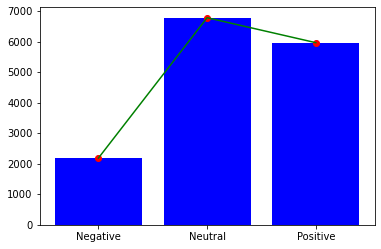

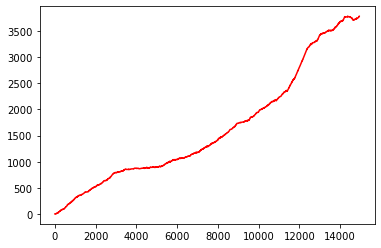

In [9]:
import pandas as pd
import textblob as tb
import matplotlib.pyplot as plt

df = pd.read_csv("demonetization-tweets.csv",encoding='cp1252')
#df

def find_sentiment(t):
    try:
        analyse = tb.TextBlob(t)
        polar = analyse.sentiment.polarity
        if polar > 0:
            return "Positive"
        elif polar < 0:
            return "Negative"
        else:
            return "Neutral"
    except:
        return "Neutral"
        
df['sentiment'] = df['text'].apply(lambda row:find_sentiment(row))
#df

#count of sentiment
result = {}
for senti, grp in df.groupby('sentiment'):
   # print(senti,len(grp))
    result[senti] = len(grp)
print(result)

#plot
x = list(result.keys())
y = list(result.values())

plt.bar(x,y, color= 'blue')
plt.scatter(x,y, color ="red")
plt.plot(x,y, color = "green")
plt.show()

# Trend analysis
def trend_sentiment(t):
    try:
        analyse = tb.TextBlob(t)    
        if analyse.sentiment.polarity > 0:
            return 1
        elif analyse.sentiment.polarity < 0:
            return -1
        else:
            return 0
    except:
        return 0 
x = list(range(1,len(df) + 1))
y = []
tw_senti = 0
for i in x:
    t = df['text'][i-1]
    tw_senti += trend_sentiment(t)
    y.append(tw_senti)
plt.plot(x,y, color = 'red')
plt.show()




In [ ]:
'''
#print(df['text'][0])
t=df['text'][0]

analyse = tb.TextBlob(t)
polar = analyse.sentiment.polarity
if polar > 0:
    print("Positive")
elif polar < 0:
    print("Negative")
else:
    print("Neutral")'''